# 기본 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc


import warnings
warnings.filterwarnings(action='ignore')
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

## 데이터 불러오기

In [2]:
bank = pd.read_csv('bank.csv')
bank.head()

age        job  married          edu  default home_loan personal_loan  \
0   56  housemaid  married     basic.4y       no        no            no   
1   57   services  married  high.school  unknown        no            no   
2   37   services  married  high.school       no       yes            no   
3   40     admin.  married     basic.6y       no        no            no   
4   56   services  married  high.school       no        no           yes   

     contact month  day  ...  campaign_count  pdays  pcampaign_count  \
0  telephone   may  mon  ...               1    999                0   
1  telephone   may  mon  ...               1    999                0   
2  telephone   may  mon  ...               1    999                0   
3  telephone   may  mon  ...               1    999                0   
4  telephone   may  mon  ...               1    999                0   

   pcampaign_result emp_var_rate  cons_price_idx  cons_conf_idx  euribor_3m  \
0       nonexistent          1.1          93.994          -36.4       4.857   
1       nonexistent          1.1          93.994          -36.4       4.857   
2       nonexistent          1.1          93.994          -36.4       4.857   
3       nonexistent          1.1          93.994          -36.4       4.857   
4       nonexistent          1.1          93.994          -36.4       4.857   

   nr_employed   y  
0       5191.0  no  
1       5191.0  no  
2       5191.0  no  
3       5191.0  no  
4       5191.0  no  

[5 rows x 21 columns]

# EDA

In [3]:
bank.shape

(41188, 21)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   married           41188 non-null  object 
 3   edu               41188 non-null  object 
 4   default           41188 non-null  object 
 5   home_loan         41188 non-null  object 
 6   personal_loan     41188 non-null  object 
 7   contact           41188 non-null  object 
 8   month             41188 non-null  object 
 9   day               41188 non-null  object 
 10  duration          41188 non-null  int64  
 11  campaign_count    41188 non-null  int64  
 12  pdays             41188 non-null  int64  
 13  pcampaign_count   41188 non-null  int64  
 14  pcampaign_result  41188 non-null  object 
 15  emp_var_rate      41188 non-null  float64
 16  cons_price_idx    41188 non-null  float6

## 라벨값 변화 및 추출

In [5]:
bank_x = bank.drop("y", axis=1)

## 기술통계량

In [6]:
bank.describe(include="all")

age     job  married                edu default home_loan  \
count   41188.00000   41188    41188              41188   41188     41188   
unique          NaN      12        4                  8       3         3   
top             NaN  admin.  married  university.degree      no       yes   
freq            NaN   10422    24928              12168   32588     21576   
mean       40.02406     NaN      NaN                NaN     NaN       NaN   
std        10.42125     NaN      NaN                NaN     NaN       NaN   
min        17.00000     NaN      NaN                NaN     NaN       NaN   
25%        32.00000     NaN      NaN                NaN     NaN       NaN   
50%        38.00000     NaN      NaN                NaN     NaN       NaN   
75%        47.00000     NaN      NaN                NaN     NaN       NaN   
max        98.00000     NaN      NaN                NaN     NaN       NaN   

       personal_loan   contact  month    day  ...  campaign_count  \
count          41188     41188  41188  41188  ...    41188.000000   
unique             3         2     10      5  ...             NaN   
top               no  cellular    may    thu  ...             NaN   
freq           33950     26144  13769   8623  ...             NaN   
mean             NaN       NaN    NaN    NaN  ...        2.567593   
std              NaN       NaN    NaN    NaN  ...        2.770014   
min              NaN       NaN    NaN    NaN  ...        1.000000   
25%              NaN       NaN    NaN    NaN  ...        1.000000   
50%              NaN       NaN    NaN    NaN  ...        2.000000   
75%              NaN       NaN    NaN    NaN  ...        3.000000   
max              NaN       NaN    NaN    NaN  ...       56.000000   

               pdays  pcampaign_count  pcampaign_result  emp_var_rate  \
count   41188.000000     41188.000000             41188  41188.000000   
unique           NaN              NaN                 3           NaN   
top              NaN              NaN       nonexistent           NaN   
freq             NaN              NaN             35563           NaN   
mean      962.475454         0.172963               NaN      0.081886   
std       186.910907         0.494901               NaN      1.570960   
min         0.000000         0.000000               NaN     -3.400000   
25%       999.000000         0.000000               NaN     -1.800000   
50%       999.000000         0.000000               NaN      1.100000   
75%       999.000000         0.000000               NaN      1.400000   
max       999.000000         7.000000               NaN      1.400000   

        cons_price_idx  cons_conf_idx    euribor_3m   nr_employed      y  
count     41188.000000   41188.000000  41188.000000  41188.000000  41188  
unique             NaN            NaN           NaN           NaN      2  
top                NaN            NaN           NaN           NaN     no  
freq               NaN            NaN           NaN           NaN  36548  
mean         93.575664     -40.502600      3.621291   5167.035911    NaN  
std           0.578840       4.628198      1.734447     72.251528    NaN  
min          92.201000     -50.800000      0.634000   4963.600000    NaN  
25%          93.075000     -42.700000      1.344000   5099.100000    NaN  
50%          93.749000     -41.800000      4.857000   5191.000000    NaN  
75%          93.994000     -36.400000      4.961000   5228.100000    NaN  
max          94.767000     -26.900000      5.045000   5228.100000    NaN  

[11 rows x 21 columns]

## 상관관계

In [7]:
 bank.corr()

age  duration  campaign_count     pdays  \
age              1.000000 -0.000866        0.004594 -0.034369   
duration        -0.000866  1.000000       -0.071699 -0.047577   
campaign_count   0.004594 -0.071699        1.000000  0.052584   
pdays           -0.034369 -0.047577        0.052584  1.000000   
pcampaign_count  0.024365  0.020640       -0.079141 -0.587514   
emp_var_rate    -0.000371 -0.027968        0.150754  0.271004   
cons_price_idx   0.000857  0.005312        0.127836  0.078889   
cons_conf_idx    0.129372 -0.008173       -0.013733 -0.091342   
euribor_3m       0.010767 -0.032897        0.135133  0.296899   
nr_employed     -0.017725 -0.044703        0.144095  0.372605   

                 pcampaign_count  emp_var_rate  cons_price_idx  cons_conf_idx  \
age                     0.024365     -0.000371        0.000857       0.129372   
duration                0.020640     -0.027968        0.005312      -0.008173   
campaign_count         -0.079141      0.150754        0.127836      -0.013733   
pdays                  -0.587514      0.271004        0.078889      -0.091342   
pcampaign_count         1.000000     -0.420489       -0.203130      -0.050936   
emp_var_rate           -0.420489      1.000000        0.775334       0.196041   
cons_price_idx         -0.203130      0.775334        1.000000       0.058986   
cons_conf_idx          -0.050936      0.196041        0.058986       1.000000   
euribor_3m             -0.454494      0.972245        0.688230       0.277686   
nr_employed            -0.501333      0.906970        0.522034       0.100513   

                 euribor_3m  nr_employed  
age                0.010767    -0.017725  
duration          -0.032897    -0.044703  
campaign_count     0.135133     0.144095  
pdays              0.296899     0.372605  
pcampaign_count   -0.454494    -0.501333  
emp_var_rate       0.972245     0.906970  
cons_price_idx     0.688230     0.522034  
cons_conf_idx      0.277686     0.100513  
euribor_3m         1.000000     0.945154  
nr_employed        0.945154     1.000000

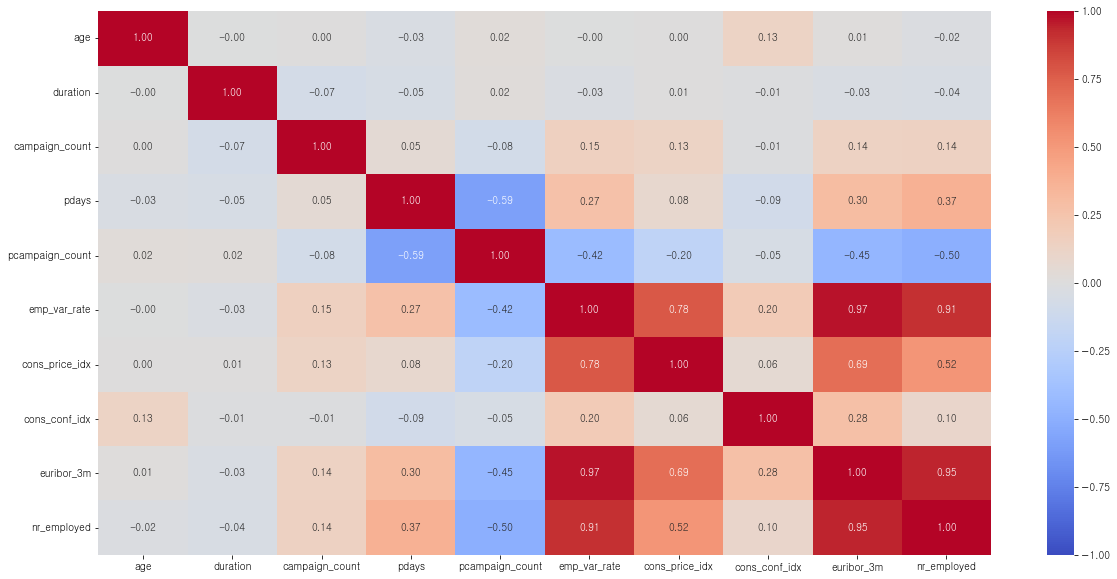

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(bank.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.show()

## 변수별 개수

In [9]:
for i in range(len(bank.columns)):
    print("value_count(): \n", bank[bank.columns[i]].value_counts())
    print("unique() : ", bank[bank.columns[i]].unique(), "\n")

value_count(): 
 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
unique() :  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

value_count(): 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
unique() :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

value_count(): 
 married     24928
single      11568
divorced     4612
unknown        80
Nam

## 명목형, 연속형 나누기

In [10]:
bank_int = bank.loc[:, ['age', 'duration', 'campaign_count', 'pdays', 'pcampaign_count']]
bank_int_name = [var for var in bank.columns if bank[var].dtype == "i8"]

bank_float = bank.loc[:, ['emp_var_rate', 'cons_price_idx','cons_conf_idx' ,'euribor_3m', 'nr_employed',]]
bank_float_name = [var for var in bank.columns if bank[var].dtype == "f8"]

bank_object = bank.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]
bank_object_name = [var for var in bank.columns if bank[var].dtype == "O"]

## 차트 그리는 함수

### int형 countplot

In [11]:
def countplot_int(data):
    plt.figure(figsize=(10, 30))

    plt.subplot(4, 1, 1)
    sns.countplot(x = data['age']//10, data=data)
    plt.title('나이대별 수 ', fontsize=15)
    plt.xticks(range(0,10),['10대','20대','30대','40대','50대','60대',
                        '70대','80대','90대',''])
    
    

    plt.subplot(4, 1, 2)
    sns.countplot(x = data['duration']//60, data=data)
    plt.title('연락시간(분)당 수', fontsize=15)

    plt.subplot(4, 1, 3)
    sns.countplot(x = data['campaign_count'], data=data)
    plt.title('이번 캠페인 연락 횟수', fontsize=15)

    plt.subplot(4, 1, 4)
    sns.countplot(x = data['pcampaign_count'], data=data)
    plt.title('과거 캠페인 참여 횟수', fontsize=15)

    plt.tight_layout()
    plt.show()

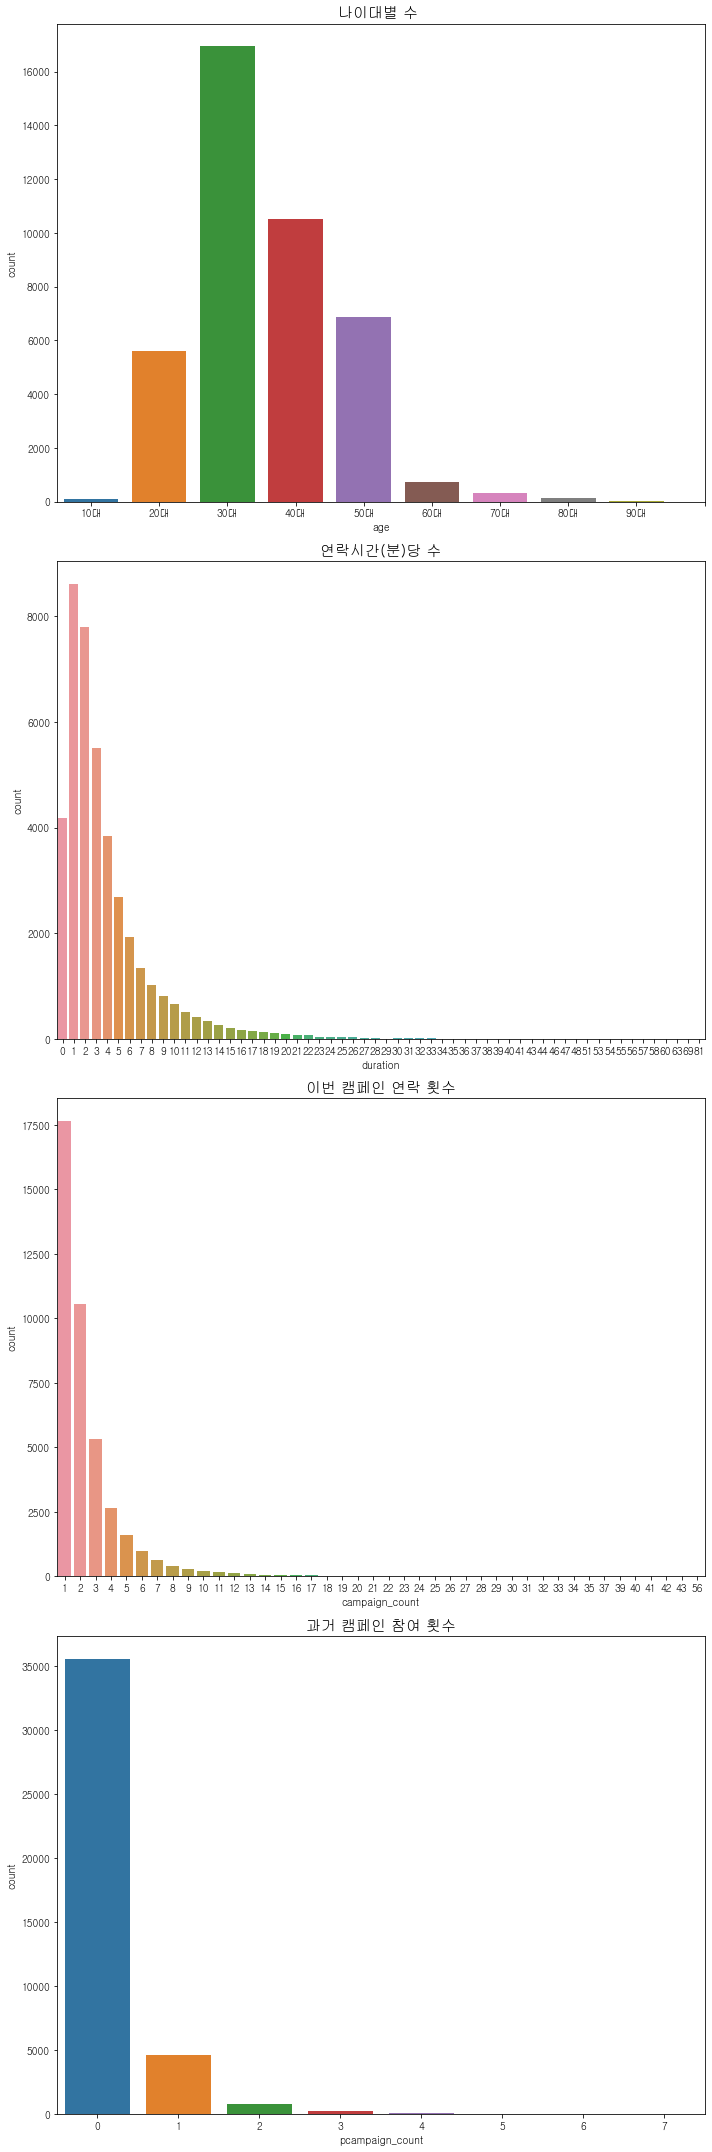

In [12]:
countplot_int(bank_int)

### int형 boxplot

In [13]:
def boxplot_int(data):
    cnt=0
    column_name=['나이','연락시간','이번 캠페인 연락횟수', '마지막 연락후 지난 횟수', '이전 캠페인 연락 ']
    for i in data:
        plt.figure(figsize=(8,5))
        sns.boxplot(y = data[i], data = data)
        plt.title(column_name[cnt],fontsize=15)
        plt.xlabel(data.columns[cnt])
        plt.ylabel('')
        cnt+=1
        plt.show()
        print('\n')

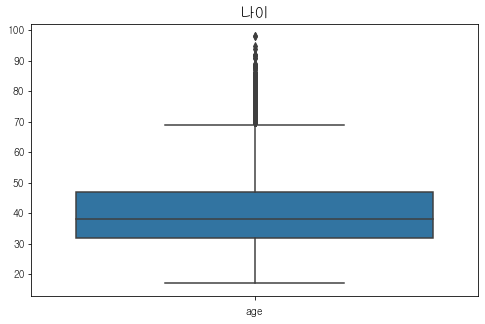

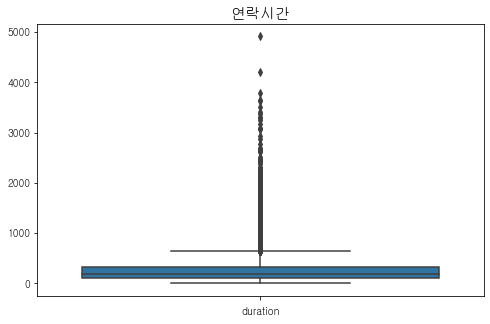

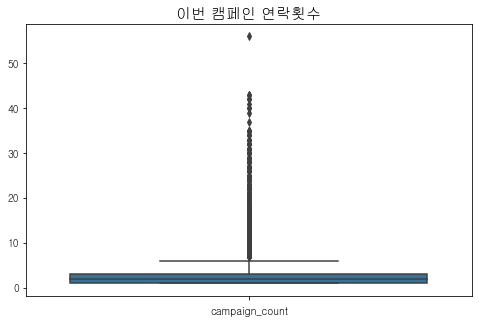

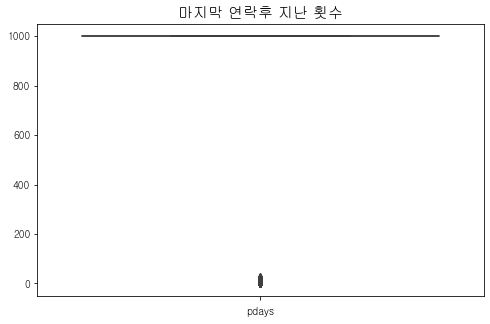

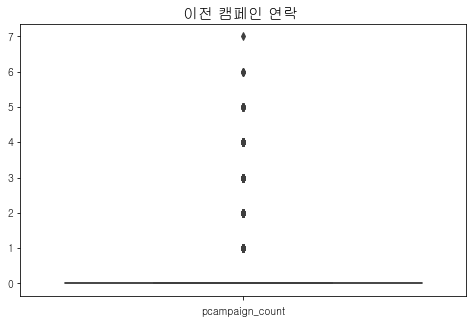

In [14]:
boxplot_int(bank_int)

### float형 boxplot

In [15]:
#float형 boxplot
def boxplot_float(data):
    cnt=0
    column_name=['고용 변동률','소비자 물가 지수','소비자 신뢰 지수','3개월 유로화 단기차입 금리 비율','직원 수']
    for i in data:
        plt.figure(figsize=(8,5))
        sns.boxplot(y = data[i], data = data)
        plt.title(column_name[cnt],fontsize=15)
        plt.ylabel('')
        plt.xlabel(data.columns[cnt])
        cnt+=1
        plt.show()
        print('\n')

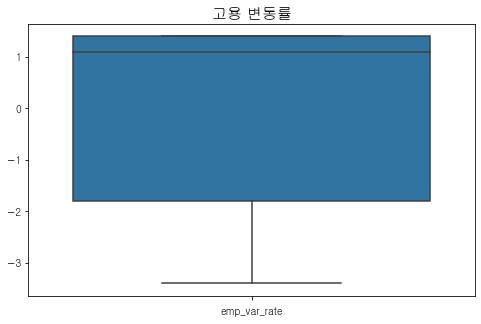

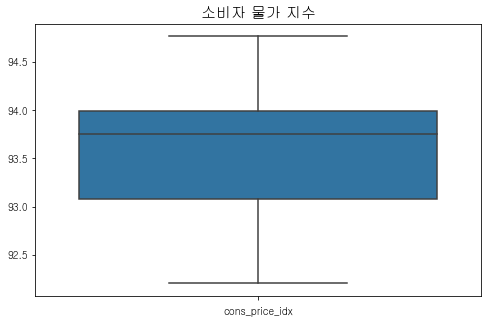

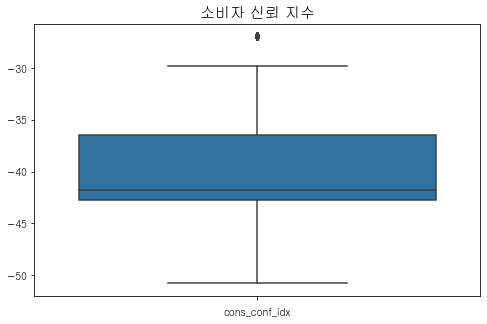

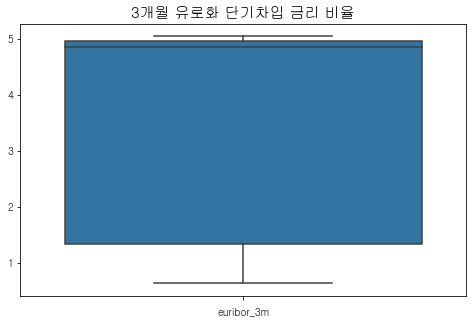

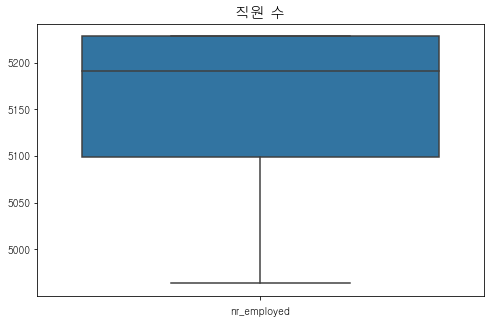

In [16]:
boxplot_float(bank_float)

##### AGE

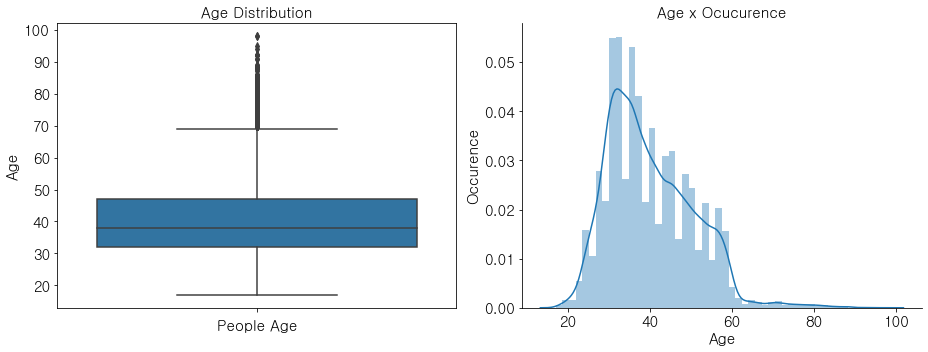

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(y = 'age', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [18]:
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
print('4º Quartile: ', bank['age'].quantile(q = 1.00))

print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - 
                           bank['age'].quantile(q = 0.25)), 
      'are outliers')
print(f"outliers:{round(len(bank[bank['age']>69.5])/len(bank['age'])*100,2)}%")

print(f"AGE MEAN : {round(bank['age'].mean(),1)}")
print(f"AGE STD  : {round(bank['age'].std(),1)}")

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
outliers:1.14%
AGE MEAN : 40.0
AGE STD  : 10.4


In [19]:
def age(dataframe1):
    dataframe=dataframe1.copy()
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

In [20]:
bank_age=age(bank)

In [21]:
print(bank_age['age'].unique())
age_list=[]
for i in range(1,5):
    age_list.append(bank_age[bank_age['age']==i]['y'].value_counts())
print(round(age_list[0]['yes']/len(bank[bank['y']=='yes']),2))
print(round(age_list[1]['yes']/len(bank[bank['y']=='yes']),2))
print(round(age_list[2]['yes']/len(bank[bank['y']=='yes']),2))
print(round(age_list[3]['yes']/len(bank[bank['y']=='yes']),2))

age_list

[3 2 1 4]
0.33
0.39
0.24
0.04


[no     9648
 yes    1528
 Name: y, dtype: int64,
 no     18348
 yes     1791
 Name: y, dtype: int64,
 no     8332
 yes    1119
 Name: y, dtype: int64,
 no     220
 yes    202
 Name: y, dtype: int64]

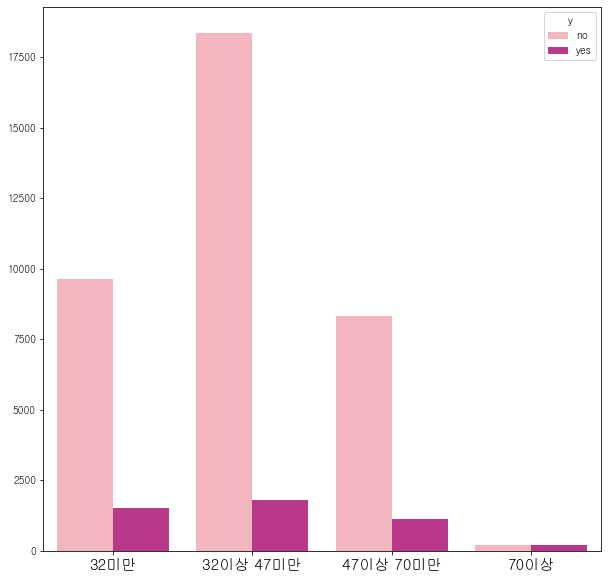

In [22]:
age_index=['32미만','32이상 47미만','47이상 70미만','70이상']
plt.figure(figsize=(10,10))
ax=sns.countplot(x='age',
              hue='y',
              palette='RdPu',
              data=bank_age)
ax.set_xticklabels(age_index,fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

##### DURATION

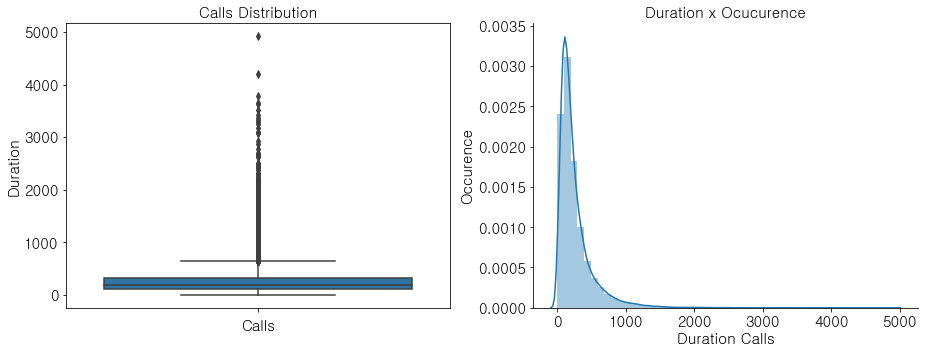

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(y = 'duration', data = bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=15)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Calls Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Duration x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [24]:
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank['duration'].quantile(q = 1.00))
print('Duration calls above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - 
                           bank['duration'].quantile(q = 0.25)), 
      'are outliers')
print(f"outliers COUNT : {bank[bank['duration']>644.5]['age'].count()}")
print(f"outliers :{round(len(bank[bank['duration']>644.5])/len(bank['duration'])*100,2)}%")
print(f"DURATION MEAN  : {round(bank['duration'].mean(),1)}")
print(f"DURATION STD   : {round(bank['duration'].std(),1)}")

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers
outliers COUNT : 2963
outliers :7.19%
DURATION MEAN  : 258.3
DURATION STD   : 259.3


In [25]:
def duration(data1):
    
    data=data1.copy()
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']= 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']= 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration']= 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5
    return data

In [26]:
bank_duration=duration(bank)

In [27]:
print(bank_duration['duration'].unique())
duration_list=[]
for i in range(1,6):
    duration_list.append(bank_duration[bank_duration['duration']==i]['y'].value_counts())
print(round(duration_list[0]['yes']/len(bank[bank['y']=='yes']),2))
print(round(duration_list[1]['yes']/len(bank[bank['y']=='yes']),2))
print(round(duration_list[2]['yes']/len(bank[bank['y']=='yes']),2))
print(round(duration_list[3]['yes']/len(bank[bank['y']=='yes']),2))
print(round(duration_list[4]['yes']/len(bank[bank['y']=='yes']),2))

[3 2 4 1 5]
0.02
0.1
0.23
0.32
0.33


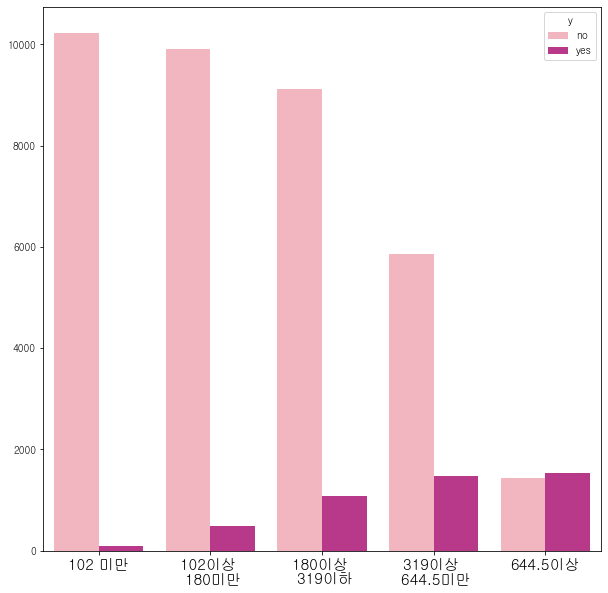

In [28]:
duration_index=['102 미만', '102이상 \n 180미만','180이상 \n 319이하',
               '319이상 \n 644.5미만','644.5이상']
plt.figure(figsize=(10,10))
ax=sns.countplot(x='duration',
              hue='y',
              palette='RdPu',
              data=bank_duration)
ax.set_xticklabels(duration_index,fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

### 범주형 pieplot

In [29]:
def pie(data):
    count=0
    column_name=['직업','결혼 여부','교육수준','채무불이행','집대출 여부', '개인대출 여부',
                 '연락 방법','연락한 달','연락한 요일','이전 캠페인 결과']
    for i in data:
        fig = plt.figure(figsize=(13, 13))
        ax = fig.add_subplot()
        pie = ax.pie(x = data[i].value_counts(), autopct='%.1f%%', textprops={'fontsize':23})
        plt.title(column_name[count],fontsize=30)
        plt.legend(pie[0],labels = data[i].unique(), loc='upper left')
        plt.show()
        count+=1
        print('\n')        

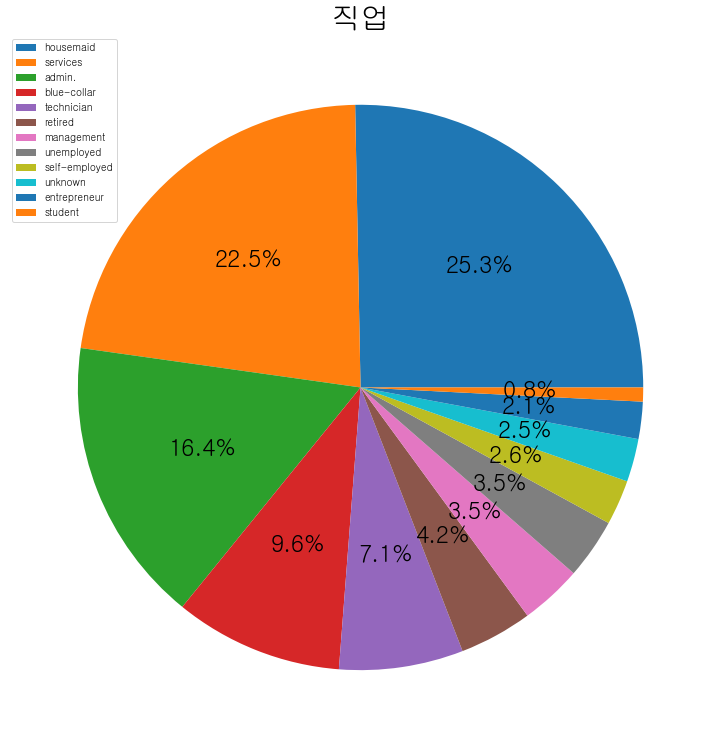

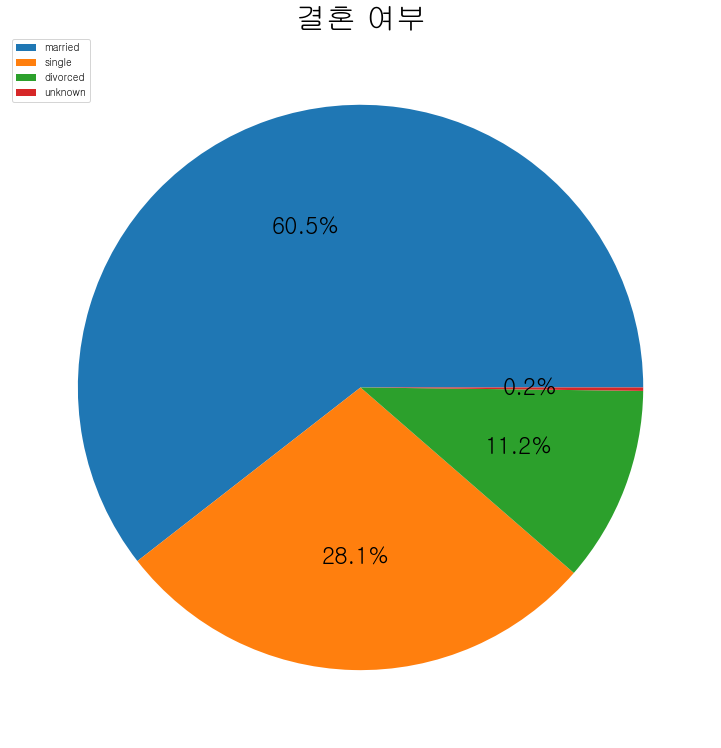

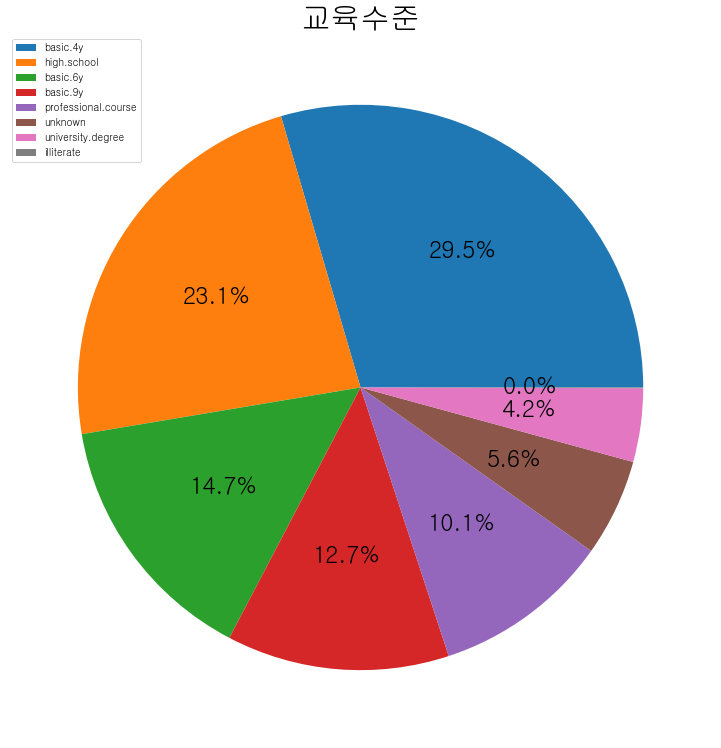

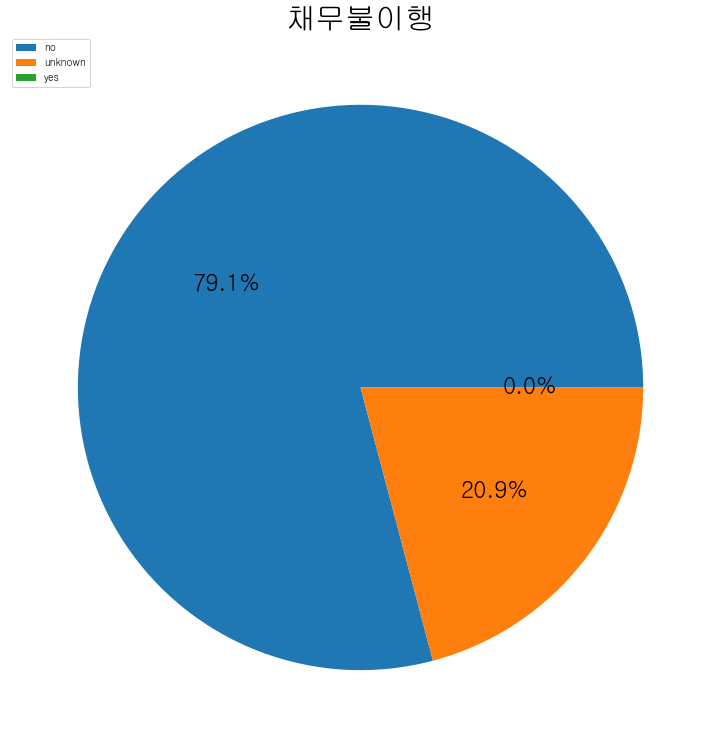

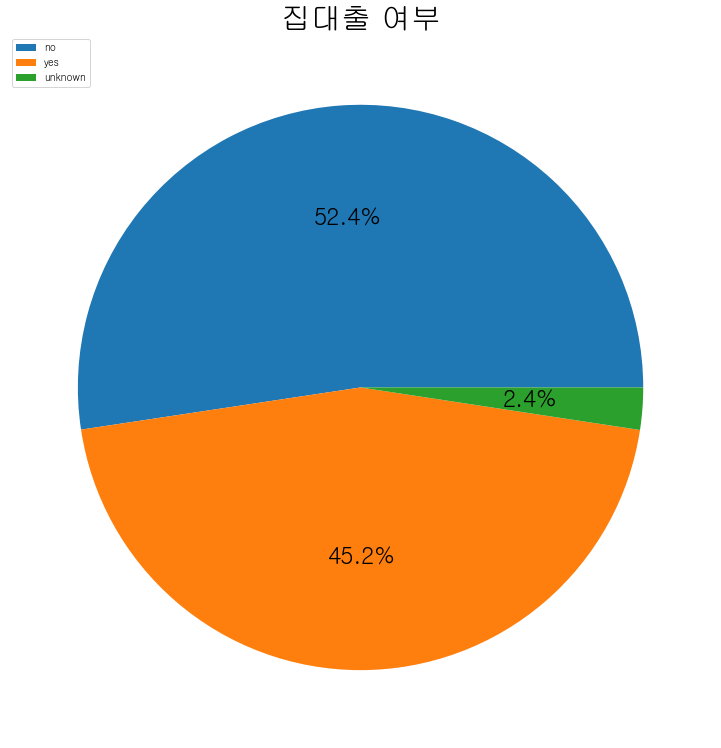

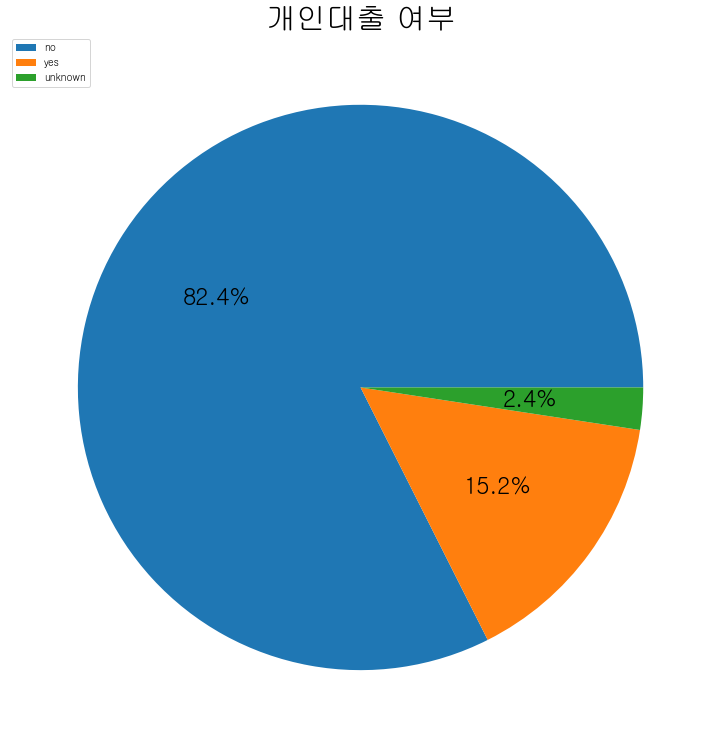

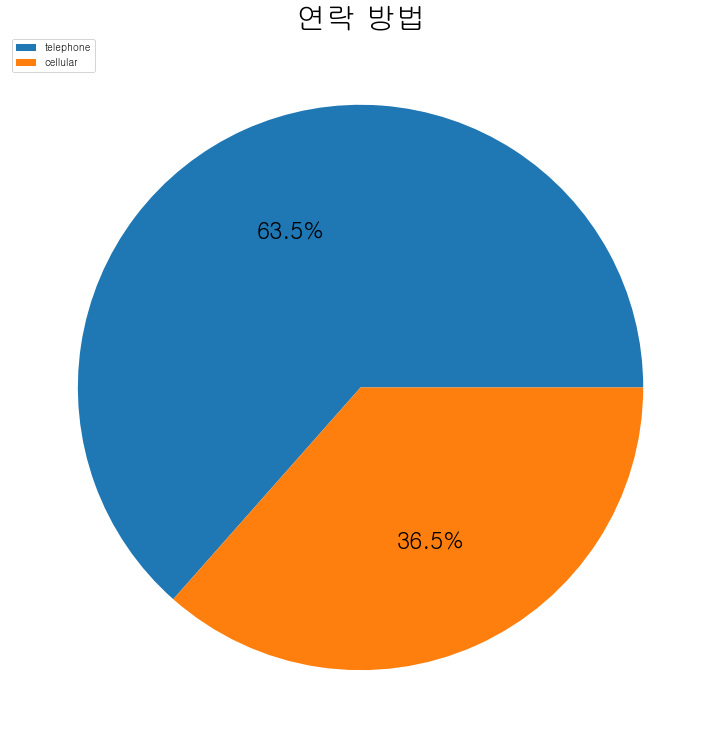

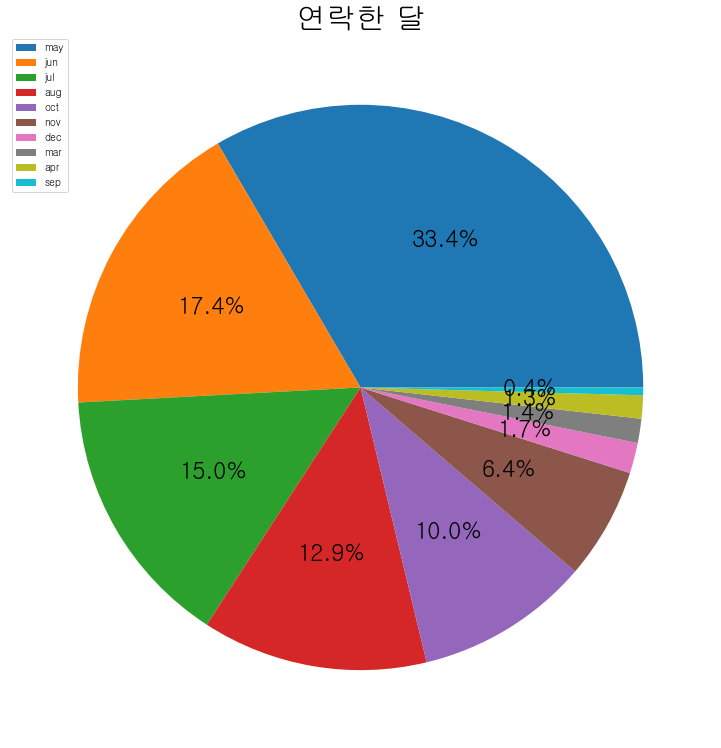

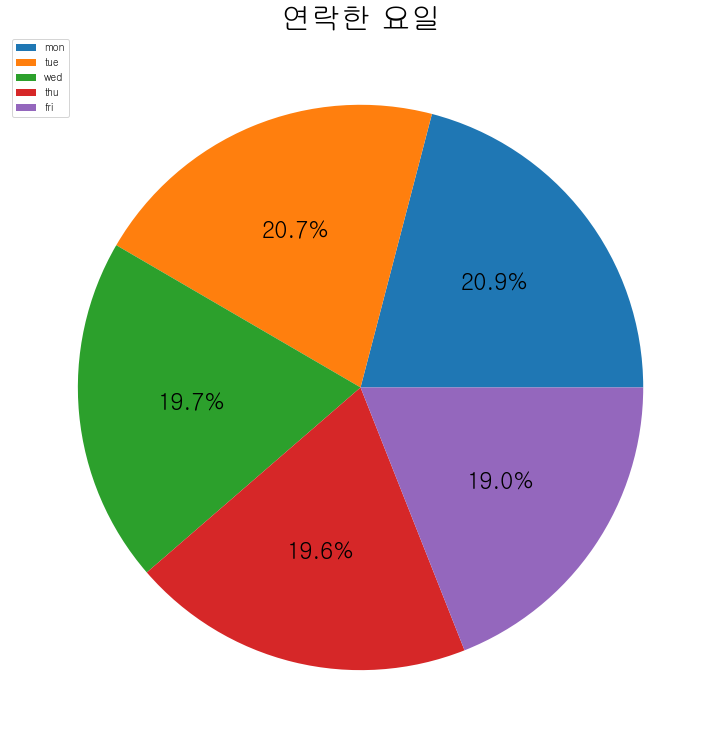

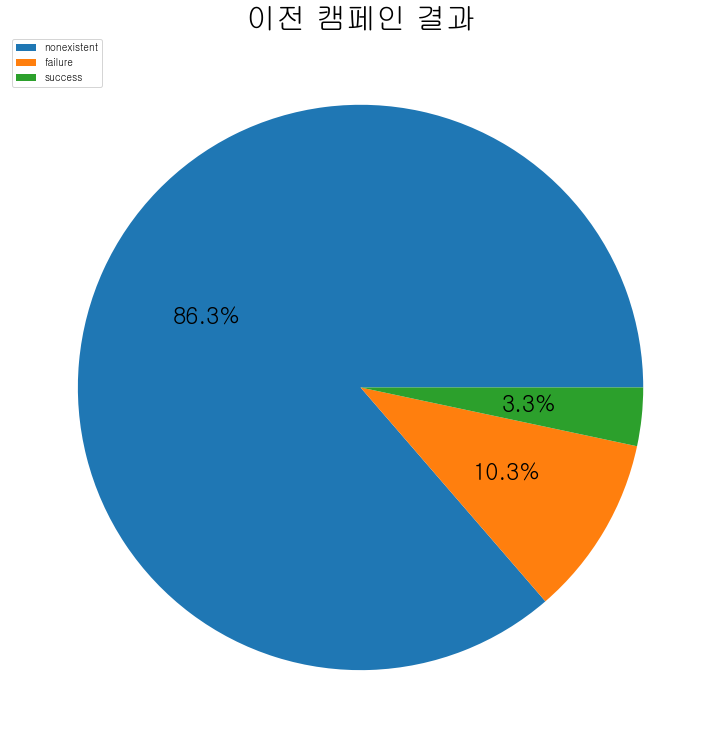

In [30]:
pie(bank_object)

### y변수와의 관계

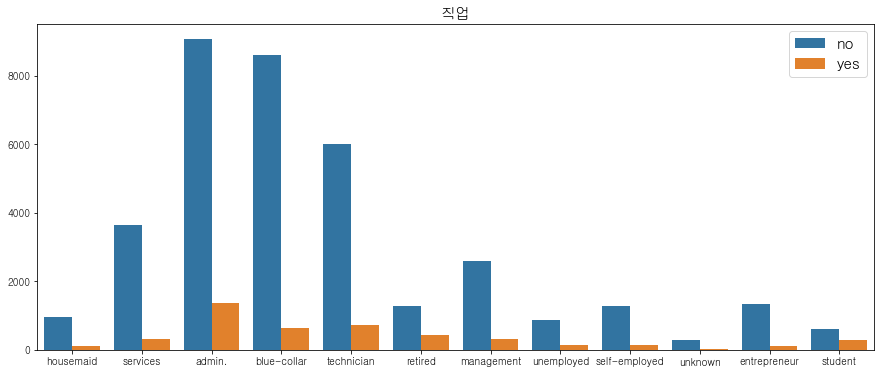

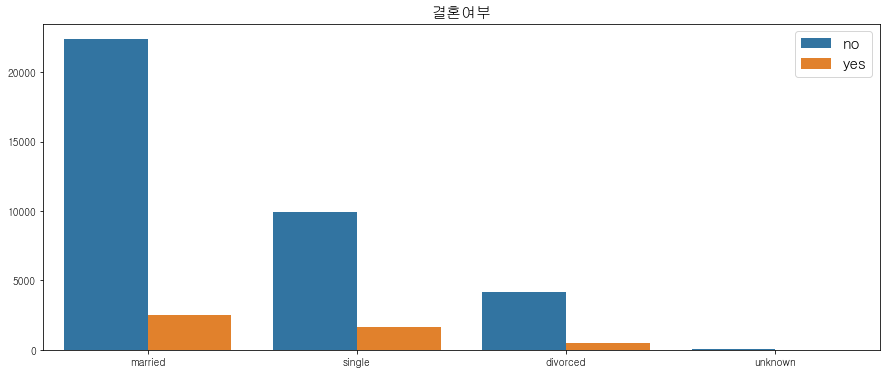

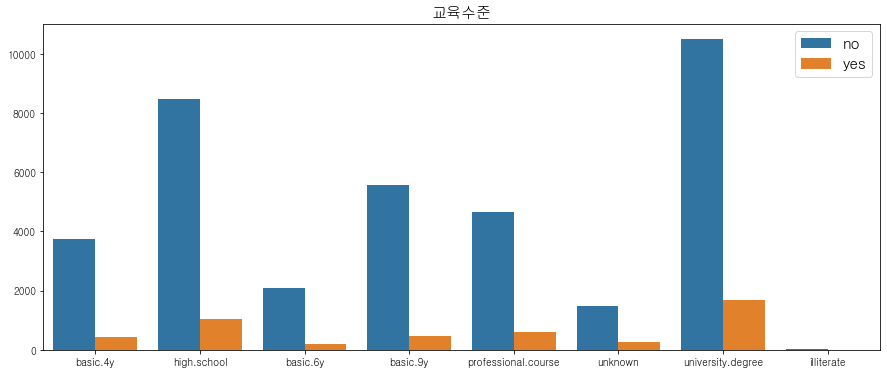

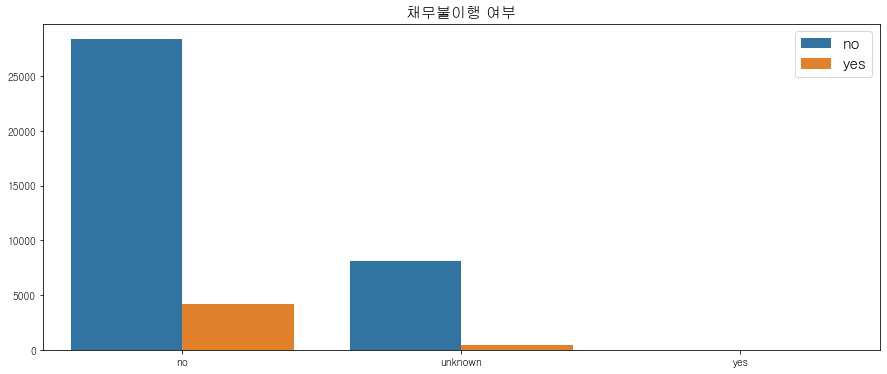

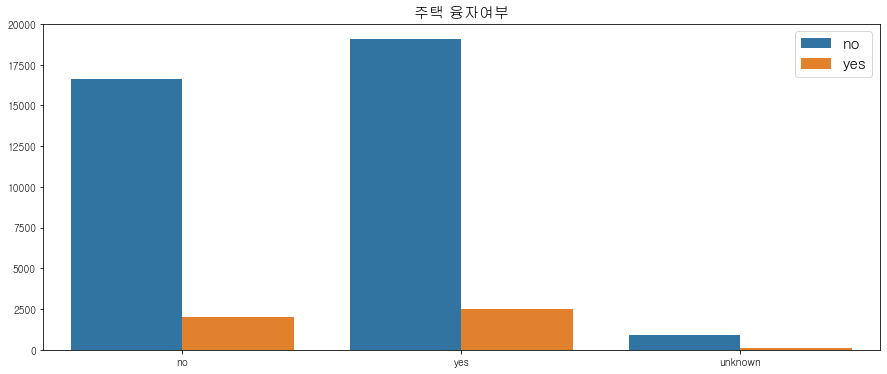

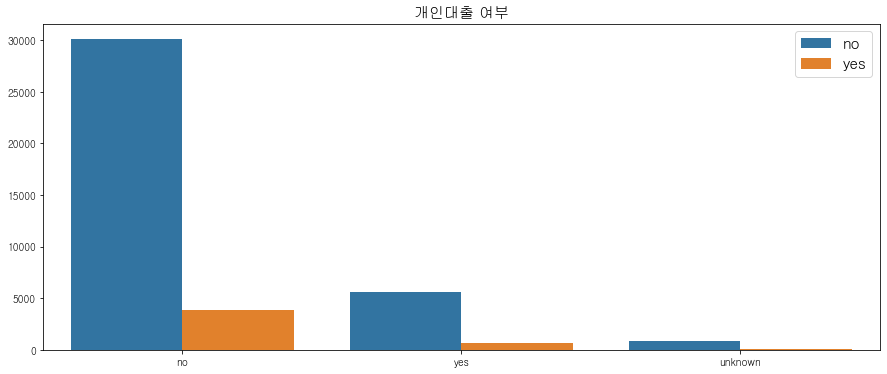

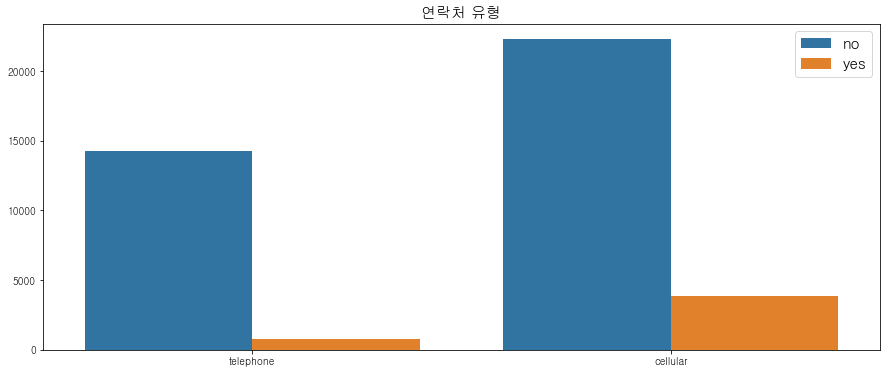

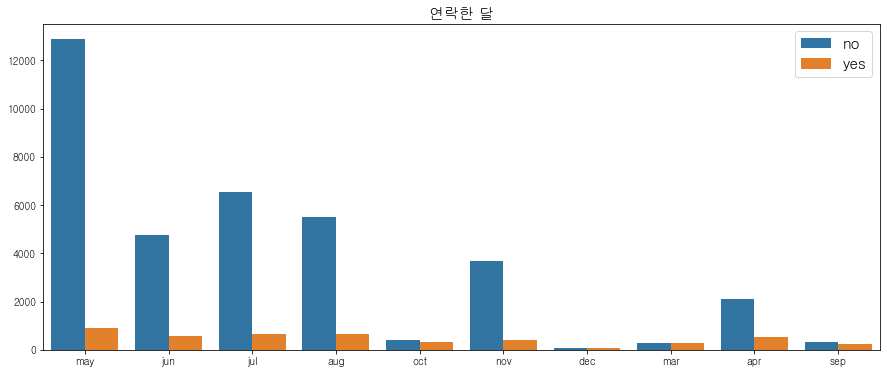

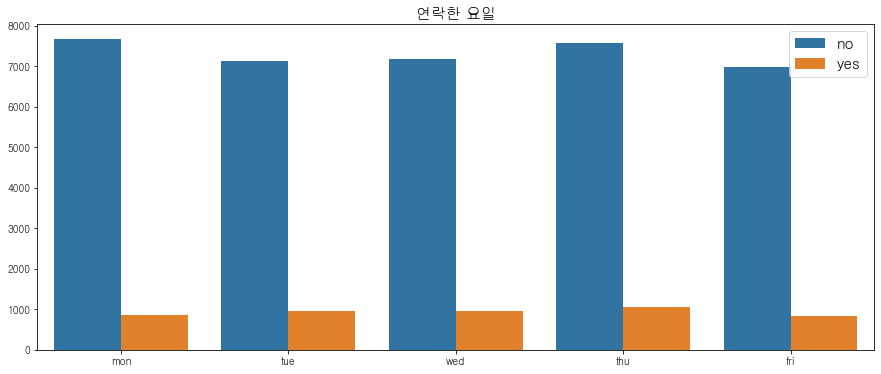

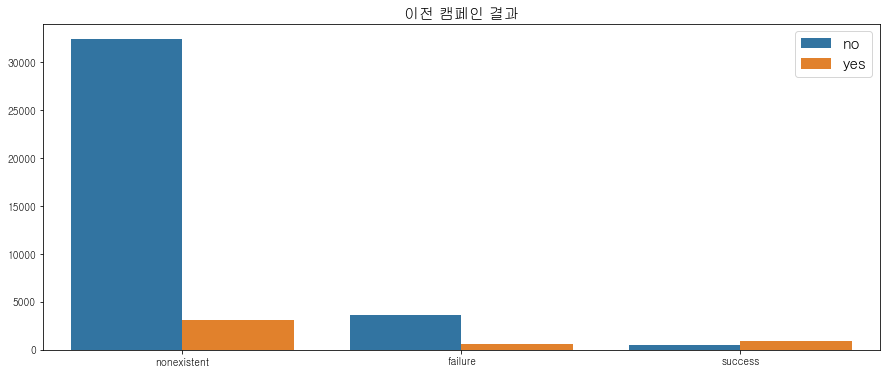

In [31]:
column_name=['직업','결혼여부','교육수준','채무불이행 여부',
              '주택 융자여부','개인대출 여부','연락처 유형','연락한 달','연락한 요일',
             '이전 캠페인 결과']
cnt=0
for column in bank_object:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=bank[column], hue=bank['y'])
    plt.legend(loc='upper right',fontsize=15)
    plt.title(column_name[cnt],fontsize=15)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    cnt+=1

## 결측치 분포 확인

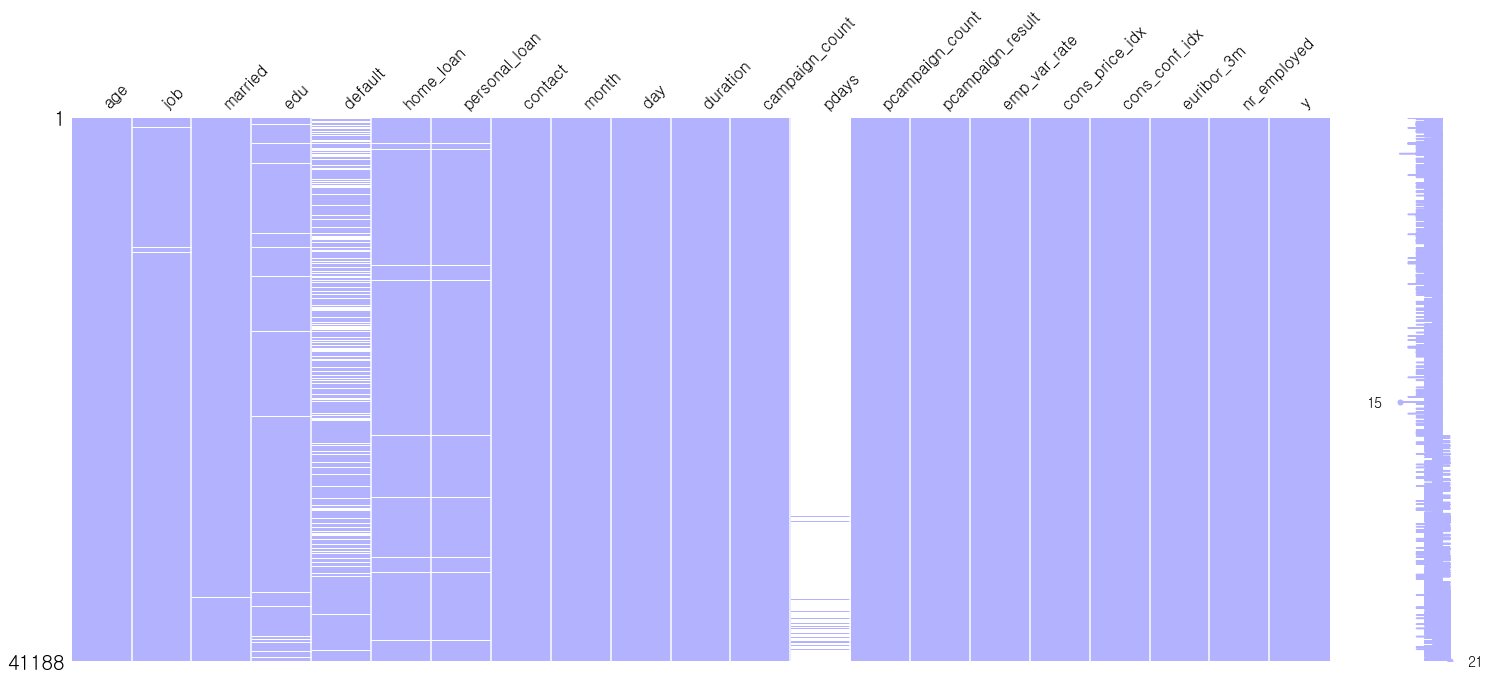

In [32]:
bank_missing=bank.replace('unknown', np.NaN)
bank_missing=bank_missing.replace(999, np.NaN)

# 결측치 분포 확인하기
import missingno
missingno.matrix(bank_missing, color=(0.7, 0.7, 1.0))
plt.show()

In [33]:
bank_missing.isnull().sum()

age                     0
job                   330
married                80
edu                  1731
default              8597
home_loan             990
personal_loan         990
contact                 0
month                   0
day                     0
duration                2
campaign_count          0
pdays               39673
pcampaign_count         0
pcampaign_result        0
emp_var_rate            0
cons_price_idx          0
cons_conf_idx           0
euribor_3m              0
nr_employed             0
y                       0
dtype: int64

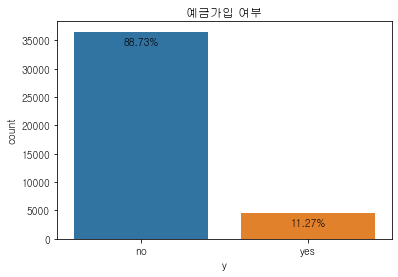

In [34]:
# 값 라벨로 지정하는 함수
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}%".format(y_value/total*100)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)


ax = sns.countplot(x = bank['y'])  #Imbalanced dataset
plt.title('예금가입 여부')
label_values(ax, spacing=-15)
plt.show()

# feature engineering

## 속성 그룹화하기

In [35]:
q1 = bank["duration"].quantile(0.25)
q3 = bank["duration"].quantile(0.75)
IQR = q3 - q1

bank_outlier_cut = bank[(bank["duration"] < q3 + IQR*1.5) & (bank["duration"] > q1 - IQR*1.5)]

In [36]:
bank_age_outlier_cut = age(bank_outlier_cut)

In [37]:
bank_engine = bank_age_outlier_cut[(bank_age_outlier_cut["age"]!=4)]

In [38]:
y = bank_engine.iloc[:, -1].replace({"no":0, "yes":1}).reset_index(drop=True)
bank_x = bank_engine.drop("y", axis=1).reset_index(drop=True)

## 인코딩

### 명목형, 연속형 나누기

In [39]:
# categorical 형식 추출 함수
categorical = bank_x.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_x.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

### Label Encoding

In [40]:
def label(bank_object):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    bank_object2 = bank_object.copy()
    categorical=['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']
    for i in bank_object:
        if i in categorical:
            bank_object2[i] = labelencoder_X.fit_transform(bank_object[i])
    return bank_object2

### One-hot Encoding

In [41]:
def onehot(bank_object):
    categorical = bank_object.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]
    numerical = [x for x in bank_x.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]
    return pd.concat([pd.get_dummies(categorical), bank_object[numerical]],axis=1)

## 데이터셋 나누기

In [42]:
def data_split(data,target):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, random_state=3021)
    return X_train, X_test, y_train, y_test

## 표준화

### MinMax Scaler

In [43]:
def minmax():
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    return scaler

### Standard Scaler

In [44]:
def standard():
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    return scaler

### MinMaxAbs Scaler

In [45]:
def abs():
    from sklearn.preprocessing import MaxAbsScaler
    scaler = MaxAbsScaler()
    return scaler

## 데이터프레임으로 합치고 데이터셋 나누기

### Standard + Label

In [46]:
def standard_onehot(data,target):
    onehot_label=label(data)
    X_train, X_test, y_train, y_test=data_split(label_data,target)
    sd=standard()
    X_train=sd.fit_transform(X_train)
    X_test=sd.transform(X_test)
    return X_train, X_test, y_train, y_test

### Standard + Onehot

In [47]:
def standard_onehot(data,target):
    onehot_data=onehot(data)
    X_train, X_test, y_train, y_test=data_split(onehot_data,target)
    sd=standard()
    X_train=sd.fit_transform(X_train)
    X_test=sd.transform(X_test)
    return X_train, X_test, y_train, y_test

### MinMax + Label

In [48]:
def minmax_label(data,target):
    label_data=label(data)
    X_train, X_test, y_train, y_test=data_split(label_data,target)
    mm=minmax()
    X_train=mm.fit_transform(X_train)
    X_test=mm.transform(X_test)
    return X_train, X_test, y_train, y_test

### MinMax + Onehot

In [49]:
def minmax_onehot(data,target):
    onehot_data=onehot(data)
    X_train, X_test, y_train, y_test=data_split(onehot_data,target)
    mm=minmax()
    X_train=mm.fit_transform(X_train)
    X_test=mm.transform(X_test)
    return X_train, X_test, y_train, y_test

### Abs + Label

In [50]:
def abs_label(data,target):
    label_data=label(data)
    X_train, X_test, y_train, y_test=data_split(label_data,target)
    abs_scale=abs()
    X_train=abs_scale.fit_transform(X_train)
    X_test=abs_scale.transform(X_test)
    return X_train, X_test, y_train, y_test

### Abs + Onehot

In [51]:
def abs_label(data,target):
    onehot_data=onehot(data)
    X_train, X_test, y_train, y_test=data_split(label_data,target)
    abs_scale=abs()
    X_train=abs_scale.fit_transform(X_train)
    X_test=abs_scale.transform(X_test)
    return X_train, X_test, y_train, y_test

# modeling

##  model import

In [52]:
from sklearn.tree import DecisionTreeClassifier                                       # 의사결정나무
from sklearn.naive_bayes import GaussianNB                                            # 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier                                    # K-최근접 이웃
from sklearn.linear_model import LogisticRegression                                   # 로지스틱 회귀 모델
from sklearn.svm import SVC                                                           # 서포트 벡터 머신(SVM)
from sklearn.neural_network import MLPClassifier                                      # 인공신경망(ANN)
from sklearn.ensemble import BaggingClassifier                                        # 배깅
from sklearn.ensemble import AdaBoostClassifier                                       # 부스팅
from sklearn.ensemble import GradientBoostingClassifier                               # 그래디언트 부스트
from sklearn.ensemble import RandomForestClassifier                                   # 랜덤포레스트
from xgboost import XGBClassifier                                                     # XGBoost
from lightgbm import LGBMClassifier                                                   # LightGBM
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis               # 이차판별분석(QDA)
from sklearn.multiclass import OneVsOneClassifier                                     # OVO
from sklearn.multiclass import OneVsRestClassifier                                    # OVR

In [53]:
def modeling(X_train, X_test, y_train, y_test):
    from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
    
    dt = DecisionTreeClassifier(max_depth=5)
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    lr = LogisticRegression()
    svc = SVC()
    ovo = OneVsOneClassifier(DecisionTreeClassifier())
    ovr = OneVsRestClassifier(DecisionTreeClassifier())
    mlp = MLPClassifier()
    bag = BaggingClassifier()
    ada = AdaBoostClassifier()
    rf = RandomForestClassifier(max_depth=5)
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    lgbm = LGBMClassifier()
    qda = QuadraticDiscriminantAnalysis()
    
    model = [dt, nb, knn, lr, svc, ovo, ovr, mlp, bag, ada, rf, gb, xgb, lgbm, qda]
    #model = [lgbm]
    model_name = ["Decision Tree", "Naive Bayes", "KNN", "Logistic Regression", 
                  "SVC", "OvO", "OvR", "MLP", "Bagging", "AdaBoost", "RandomForest", 
                  "GradientBoost", "XGBoost", "LightGBM", "QDA"]
    #model_name = ["lgbm"]
    scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i in model:
        i.fit(X_train, y_train)
        y_pred = i.predict(X_test)
        scores.append(round(i.score(X_test, y_test), 3))
        precision_scores.append(round(precision_score(y_test, y_pred, average="macro"),3))
        recall_scores.append(round(recall_score(y_test, y_pred, average="macro"),3))
        f1_scores.append(round(f1_score(y_test, y_pred, average='weighted'),3))

    return pd.DataFrame(data={"model name":model_name, "score":scores,
                              "precision":precision_scores, "recall":recall_scores, 
                              "f1":f1_scores})

## 모델링

In [54]:
X_train, X_test, y_train, y_test=minmax_label(bank_x,y)

In [55]:
result_ml = modeling(X_train, X_test, y_train, y_test)

[10:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
result_ml.sort_values(by='f1')

model name  score  precision  recall     f1
1           Naive Bayes  0.863      0.651   0.802  0.885
14                  QDA  0.900      0.689   0.790  0.910
5                   OvO  0.922      0.726   0.730  0.922
6                   OvR  0.922      0.726   0.732  0.922
10         RandomForest  0.939      0.869   0.640  0.925
2                   KNN  0.935      0.788   0.681  0.927
4                   SVC  0.939      0.842   0.662  0.928
3   Logistic Regression  0.940      0.819   0.704  0.934
8               Bagging  0.940      0.806   0.727  0.935
0         Decision Tree  0.942      0.819   0.720  0.936
9              AdaBoost  0.941      0.815   0.723  0.936
7                   MLP  0.942      0.813   0.739  0.938
11        GradientBoost  0.946      0.835   0.748  0.942
12              XGBoost  0.948      0.838   0.765  0.945
13             LightGBM  0.948      0.840   0.763  0.945

In [57]:
import plotly.express as px
px.histogram(result_ml, x="model name", y="f1", color="model name",text_auto=True, title='모델별 f1스코어',width=1000,height=700)

## 하이퍼파라미터 탐색

In [58]:
from sklearn.model_selection import GridSearchCV

def gs_logistic(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    logi = LogisticRegression()
    param_grid=dict(max_iter=[100, 200, 300],
                   C=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    grid_search = GridSearchCV(logi, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_logistic(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    logi = LogisticRegression()
    param_grid=dict(max_iter=[100, 200, 300],
                   C=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    grid_search = GridSearchCV(logi, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_decision(X_train, y_train):
    from sklearn.tree import DecisionTreeClassifier
    decision = DecisionTreeClassifier()
    param_grid = dict(max_depth=[6, 7, 8, 9, 10])
    grid_search = GridSearchCV(decision, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_perceptron(X_train,y_train):
    from sklearn.linear_model import Perceptron 
    pc=Perceptron()
    param_grid=dict(penalty=["l1"])
    grid_search=GridSearchCV(pc, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_svc(X_train,y_train):
    from sklearn.svm import SVC
    svc=SVC()
    param_grid=dict(C=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2], gamma=[0.01, 1, 5])
    grid_search=GridSearchCV(svc, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_ovo(X_train,y_train):
    from sklearn.multiclass import OneVsOneClassifier
    ovo=OneVsOneClassifier()
    param_grid=dict(estimator=["LogisticRegression"])
    grid_search=GridSearchCV(ovo, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_ovr(X_train,y_train):
    from sklearn.multiclass import OneVsRestClassifier
    ovr=OneVsRestClassifier()
    param_grid=dict(estimator=["LogisticRegression"])
    grid_search=GridSearchCV(ovr, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_mlp(X_train, y_train):
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier()
    param_grid = dict(hidden_layer_sizes=[100, 200], activation=['tanh'])
    grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_baggingclassifier(X_train,y_train):
    from sklearn.ensemble import BaggingClassifier
    bg=BaggingClassifier()
    param_grid=dict(n_estimators=[10,50,100,150], max_features=['auto',2,3,4])
    grid_search=GridSearchCV(bg, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_randomforest(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier()
    param_grid=dict(n_estimators=[100,200,300],
                   max_depth=['None',5,6,7],
                   max_features=['auto','sqrt'])
    grid_search=GridSearchCV(rf, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_adaboostclassifier(X_train,y_train):
    from sklearn.ensemble import AdaBoostClassifier
    ad=AdaBoostClassifier()
    param_grid=dict(n_estimators=[50,300,400,500,600])
    grid_search=GridSearchCV(ad, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_gradientboostingclassifier(X_train,y_train):
    from sklearn.ensemble import GradientBoostingClassifier
    gb=GradientBoostingClassifier()
    param_grid=dict(n_estimators=[100,300,400,500,600],
                   max_depth=[3,5,6,7],
                   max_features=['None','auto'])
    grid_search=GridSearchCV(gb, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_xgclassifier(X_train,y_train):
    from xgboost import XGBClassifier
    xg=XGBClassifier()
    param_grid=dict(n_estimators=[100,300,400,500,600],
                   max_depth=[3,4,5,6],
                   gamma=[0,0.1,0.2,0.3,0.4,0.5])
    grid_search=GridSearchCV(xg, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_lgbm(X_train,y_train):
    from lightgbm import LGBMClassifier    
    from sklearn.model_selection import GridSearchCV
    lgbm = LGBMClassifier()
    param_grid = dict(n_estimators=[100, 500, 600, 700], boosting_type=["rf", "gbdt"],
                   max_depth=[-1,5,6,7], gamma=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
    grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

# 결론

## ROC CURVE

In [59]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, classification_report,auc

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8725
           1       0.72      0.54      0.62       732

    accuracy                           0.95      9457
   macro avg       0.84      0.76      0.80      9457
weighted avg       0.94      0.95      0.94      9457



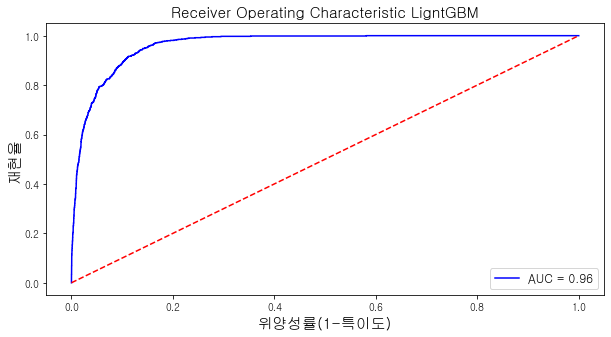

In [60]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from sklearn import metrics
fig, (ax) = plt.subplots(nrows = 1, figsize = (10,5))
probs = lgbm.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic LigntGBM', fontsize=15)
ax.set_ylabel('재현율', fontsize=15)
ax.set_xlabel('위양성률(1-특이도)', fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 12})
plt.show()

## 변수 중요도

In [61]:
lgbm_importance = (lgbm.feature_importances_ / 3000)
feature_name = pd.DataFrame(np.c_[bank_x.columns, (lgbm.feature_importances_ / 3000)]
                            ,columns=["feature", "importance"])
feature_name.sort_values(by="importance", ascending=False,inplace=True)

In [62]:
y_stack = np.cumsum(feature_name.importance, axis=0)
fig = px.histogram(feature_name, x="feature", y=y_stack, title="변수 중요도 누적합")
fig.update_yaxes(title_text='누적합')

In [63]:
import plotly.express as px
fig = px.pie(feature_name, names="feature", values="importance", title="변수중요도", width=1000,height=700)
fig.show()

## 변수 선택

In [64]:
from sklearn.feature_selection import RFE

In [65]:
lgbm = LGBMClassifier()
rfe_model = RFE(lgbm, n_features_to_select=10)
rfe_model.fit(X_train, y_train)

RFE(estimator=LGBMClassifier(), n_features_to_select=10)

In [66]:
feature_select = pd.DataFrame(data=np.c_[bank_x.columns.values, rfe_model.get_support()],
                             columns=["feature", "selected"])

In [67]:
feature_select.sort_values(by="selected", ascending=False)

feature selected
0                age     True
8              month     True
18        euribor_3m     True
16    cons_price_idx     True
12             pdays     True
11    campaign_count     True
1                job     True
9                day     True
10          duration     True
3                edu     True
7            contact    False
6      personal_loan    False
5          home_loan    False
4            default    False
13   pcampaign_count    False
14  pcampaign_result    False
15      emp_var_rate    False
17     cons_conf_idx    False
2            married    False
19       nr_employed    False

In [68]:
#선택된 변수
from sklearn.metrics import roc_curve, classification_report,auc
bank_selected=bank_x.loc[:, ["duration", "age", "edu", "euribor_3m", "cons_price_idx", 
                                  "campaign_count", "contact", "month", "job", "pdays"]]
bank_train_selected, bank_test_selected, y_train, y_test=minmax_label(bank_selected,y)
lgbm.fit(bank_train_selected, y_train)
pred = lgbm.predict(bank_test_selected)

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8725
           1       0.71      0.52      0.60       732

    accuracy                           0.95      9457
   macro avg       0.83      0.75      0.79      9457
weighted avg       0.94      0.95      0.94      9457



# 추가 제안

## RFE를 통한 변수 제거

In [69]:
result_select=modeling(bank_train_selected,bank_test_selected,y_train,y_test)

[10:03:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
result_select.sort_values("f1", ascending=False)

model name  score  precision  recall     f1
12              XGBoost  0.946      0.828   0.758  0.943
13             LightGBM  0.946      0.835   0.752  0.943
11        GradientBoost  0.945      0.832   0.735  0.940
8               Bagging  0.941      0.807   0.737  0.937
7                   MLP  0.942      0.830   0.706  0.935
0         Decision Tree  0.941      0.832   0.694  0.933
9              AdaBoost  0.939      0.806   0.705  0.932
2                   KNN  0.935      0.784   0.696  0.929
3   Logistic Regression  0.935      0.801   0.666  0.926
10         RandomForest  0.939      0.859   0.643  0.926
4                   SVC  0.937      0.842   0.643  0.925
1           Naive Bayes  0.922      0.730   0.739  0.923
6                   OvR  0.921      0.725   0.734  0.922
5                   OvO  0.921      0.723   0.733  0.921
14                  QDA  0.922      0.725   0.717  0.921

In [71]:
import plotly.express as px
px.histogram(result_select, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## pdays 제거

In [80]:
bank_pdays_del = bank.drop(["pdays",'y'], axis=1)

In [81]:
y=bank.loc[:,'y'].replace({"no":0, "yes":1})

In [82]:
X_train, X_test, y_train, y_test=minmax_label(bank_pdays_del,y)

### 모델링

In [83]:
result_pays_del = modeling(X_train, X_test, y_train, y_test)

[10:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
result_pays_del.sort_values("f1", ascending=False)

model name  score  precision  recall     f1
13             LightGBM  0.913      0.791   0.746  0.910
11        GradientBoost  0.914      0.795   0.738  0.909
12              XGBoost  0.912      0.787   0.746  0.909
7                   MLP  0.911      0.782   0.746  0.908
0         Decision Tree  0.911      0.783   0.736  0.907
8               Bagging  0.907      0.775   0.718  0.902
3   Logistic Regression  0.908      0.792   0.676  0.897
9              AdaBoost  0.907      0.790   0.677  0.896
5                   OvO  0.890      0.726   0.734  0.891
6                   OvR  0.889      0.724   0.735  0.890
4                   SVC  0.904      0.796   0.630  0.885
10         RandomForest  0.906      0.827   0.619  0.884
14                  QDA  0.875      0.705   0.772  0.883
2                   KNN  0.891      0.722   0.608  0.872
1           Naive Bayes  0.832      0.662   0.770  0.852

In [85]:
import plotly.express as px
px.histogram(result_pays_del, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## duration 제거

In [91]:
bank_duration_del = bank.drop(['duration','y'], axis=1)
y=bank.loc[:,'y'].replace({"no":0, "yes":1})

In [92]:
X_train, X_test, y_train, y_test=minmax_label(bank_duration_del,y)

### 모델링

In [93]:
result_duration_del = modeling(X_train, X_test, y_train, y_test)

[10:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [94]:
result_duration_del.sort_values(by='f1', ascending=False)

model name  score  precision  recall     f1
13             LightGBM  0.901      0.777   0.624  0.882
12              XGBoost  0.898      0.756   0.631  0.881
0         Decision Tree  0.900      0.782   0.615  0.880
11        GradientBoost  0.900      0.785   0.612  0.879
7                   MLP  0.898      0.765   0.610  0.877
9              AdaBoost  0.900      0.792   0.600  0.876
3   Logistic Regression  0.898      0.783   0.595  0.874
4                   SVC  0.898      0.783   0.594  0.873
14                  QDA  0.869      0.682   0.704  0.873
8               Bagging  0.887      0.705   0.620  0.872
2                   KNN  0.889      0.712   0.607  0.871
10         RandomForest  0.899      0.799   0.585  0.871
1           Naive Bayes  0.836      0.638   0.690  0.849
6                   OvR  0.836      0.608   0.621  0.841
5                   OvO  0.831      0.605   0.624  0.838

In [95]:
import plotly.express as px
px.histogram(result_duration_del, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## 결측치 삭제

In [100]:
bank_x_missing_cut = bank.replace("unknown", np.NaN)
bank_x_missing_cut = bank_x_missing_cut.dropna(axis=0)

In [101]:
y = bank_x_missing_cut.replace({"no":0, "yes":1})
y = y.iloc[:, -1]
bank_x_missing_cut = bank_x_missing_cut.drop("y", axis=1).reset_index()

In [102]:
X_train, X_test, y_train, y_test=minmax_label(bank_x_missing_cut,y)

### 모델링

In [103]:
result_missing = modeling(X_train, X_test, y_train, y_test)

[10:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
result_missing.sort_values(by='f1', ascending=False)

model name  score  precision  recall     f1
11        GradientBoost  0.911      0.811   0.760  0.907
13             LightGBM  0.910      0.803   0.766  0.907
0         Decision Tree  0.907      0.795   0.761  0.904
12              XGBoost  0.906      0.794   0.758  0.903
7                   MLP  0.904      0.796   0.727  0.898
8               Bagging  0.896      0.770   0.719  0.890
9              AdaBoost  0.901      0.803   0.685  0.889
3   Logistic Regression  0.899      0.797   0.677  0.886
5                   OvO  0.880      0.730   0.738  0.881
6                   OvR  0.879      0.727   0.734  0.880
10         RandomForest  0.893      0.829   0.608  0.867
4                   SVC  0.890      0.794   0.612  0.866
2                   KNN  0.878      0.718   0.618  0.860
14                  QDA  0.781      0.522   0.524  0.785
1           Naive Bayes  0.672      0.617   0.758  0.727

In [105]:
import plotly.express as px
fig = px.histogram(result_missing, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")
fig.show()

## 칼럼 5개 삭제

In [ ]:
bank_delete=bank.drop(['emp_var_rate','cons_price_idx',
                        'cons_conf_idx','euribor_3m',
                        'nr_employed'],axis=1)
y=bank.loc[:,'y'].replace({"no": 0, "yes":1})
bank_delete = bank_delete.drop("y", axis=1)

In [ ]:
bank_delete.loc[bank_delete['pdays']==999,'pdays']=-1

In [ ]:
X_train, X_test, y_train, y_test = minmax_label(bank_delete, y)

### 모델링

In [ ]:
result_delete = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_delete.sort_values(by='f1',ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_delete, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## age 분류하기

In [ ]:
bank_age=age(bank_x)

In [ ]:
X_train, X_test, y_train, y_test = minmax_label(bank_age, y)

### 모델링

In [ ]:
result_age = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_age.sort_values(by='f1',ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_age, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## duration 분류하기

In [ ]:
duration_missing_value = duration(bank_x)

In [ ]:
X_train, X_test, y_train, y_test = minmax_label(duration_missing_value, y)

### 모델링

In [ ]:
result_duration_missing_value = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_duration_missing_value.sort_values(by='f1', ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_duration_missing_value, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## age & duration 분류하기

In [ ]:
# age & duration 범주변환
bank_age = age(bank_x)
bank_age_duration_cate = duration(bank_age)

In [ ]:
X_train, X_test, y_train, y_test = minmax_label(bank_age_duration_cate, y)

### 모델링

In [ ]:
result_age_duration_cate = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_age_duration_cate.sort_values("f1", ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_age_duration_cate, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## 평균값으로 결측치 처리하기

In [ ]:
bank_mean=bank_x.copy()

In [ ]:
bank_mean.loc[bank_mean['pdays']==999,'pdays']=-1

In [ ]:
bank_label=label(categorical)

In [ ]:
#1.19
bank_label[bank_label['married']==3]=1.1
# 3.7
bank_label[bank_label['job']==11]=3.7
#3.8
bank_label[bank_label['edu']==7]=3.8
#0.000098
bank_label[bank_label['default']==2]=0
#0.54
bank_label[bank_label['home_loan']==2]=0.54
#0.15
bank_label[bank_label['personal_loan']==2]=0.15

In [ ]:
X_train, X_test, y_train, y_test=data_split(bank_label,y)
mm=minmax()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

### 모델링

In [ ]:
result_mean = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_mean.sort_values("f1", ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_mean, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## 중앙값으로 결측치 처리하기

In [ ]:
bank_center=bank.copy()

In [ ]:
bank_center.drop('y',axis=1,inplace=True)

In [ ]:
bank_label=label(categorical)

In [ ]:
#1.19
bank_label[bank_label['married']==3]=2
# 3.7
bank_label[bank_label['job']==11]=1
#3.8
bank_label[bank_label['edu']==7]=3
#0.000098
bank_label[bank_label['default']==2]=0
#0.54
bank_label[bank_label['home_loan']==2]=1
#0.15
bank_label[bank_label['personal_loan']==2]=0

In [ ]:
X_train, X_test, y_train, y_test=data_split(bank_label,y)
mm=minmax()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

### 모델링

In [ ]:
result_mean = modeling(X_train, X_test, y_train, y_test)

In [ ]:
result_mean.sort_values("f1", ascending=False)

In [ ]:
import plotly.express as px
px.histogram(result_mean, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")

## 최빈값으로 결측치 처리하기

In [ ]:
bank_x_missing_fill_mode = bank_x.copy()
bank_x_missing_fill_mode.replace("unknown", np.NaN, inplace=True)

In [ ]:
bank_x_missing_fill_mode["job"].replace(np.NaN, bank_x_missing_fill_mode["job"].mode()[0], inplace=True)
bank_x_missing_fill_mode["married"].replace(np.NaN, bank_x_missing_fill_mode["married"].mode()[0], inplace=True)
bank_x_missing_fill_mode["edu"].replace(np.NaN, bank_x_missing_fill_mode["edu"].mode()[0], inplace=True)
bank_x_missing_fill_mode["default"].replace(np.NaN, bank_x_missing_fill_mode["default"].mode()[0], inplace=True)
bank_x_missing_fill_mode["home_loan"].replace(np.NaN, bank_x_missing_fill_mode["home_loan"].mode()[0], inplace=True)
bank_x_missing_fill_mode["personal_loan"].replace(np.NaN, bank_x_missing_fill_mode["personal_loan"].mode()[0], inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = minmax_label(bank_x_missing_fill_mode, y)

### 모델링

In [ ]:
a = modeling(X_train, X_test, y_train, y_test)

In [ ]:
a.sort_values("f1", ascending=False)

In [ ]:
import plotly.express as px
px.histogram(a, x="model name", y="f1", color="model name",text_auto='.2f',
                  title="모델별 f1 스코어 비교")